In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler
df=pd.read_csv(r'G:\Python\Machine Learning\Practice\Car Kaggle\train.csv')
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [71]:
df.isnull().sum().sort_values(ascending=False)

clean_title     21419
fuel_type        5083
accident         2452
id                  0
brand               0
model               0
model_year          0
milage              0
engine              0
transmission        0
ext_col             0
int_col             0
price               0
dtype: int64

In [72]:
cols_to_predict=['clean_title','fuel_type','accident']
si=SimpleImputer(strategy='most_frequent')
df[cols_to_predict]=si.fit_transform(df[cols_to_predict])
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Yes,84900


In [73]:
df.select_dtypes(include=['float','int'])

,id,model_year,milage,price
0,0,2007,213000,4200
1,1,2002,143250,4999
2,2,2002,136731,13900
3,3,2017,19500,45000
4,4,2021,7388,97500
...,...,...,...,...
188528,188528,2017,49000,27500
188529,188529,2018,28600,30000
188530,188530,2021,13650,86900
188531,188531,2022,13895,84900


In [74]:
df.select_dtypes(include=['object','category'])

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes
...,...,...,...,...,...,...,...,...,...
188528,Cadillac,Escalade ESV Platinum,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes
188531,Audi,S5 3.0T Prestige,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,Yes


<Axes: xlabel='id'>

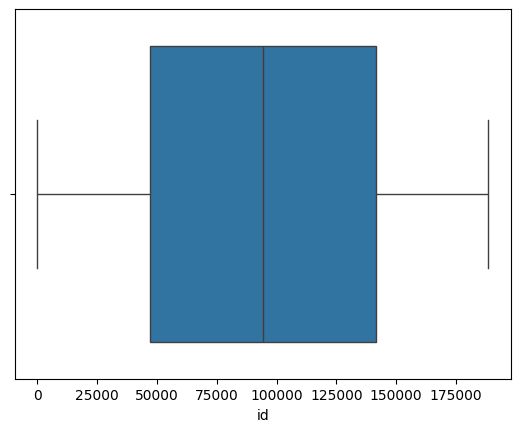

In [75]:
sns.boxplot(df,x='id')

<Axes: xlabel='model_year'>

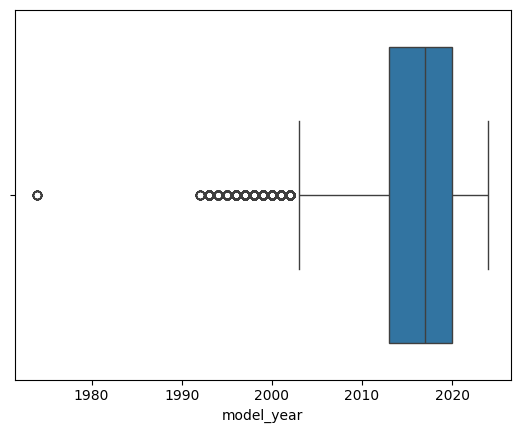

In [76]:
sns.boxplot(df,x='model_year')

<Axes: xlabel='milage'>

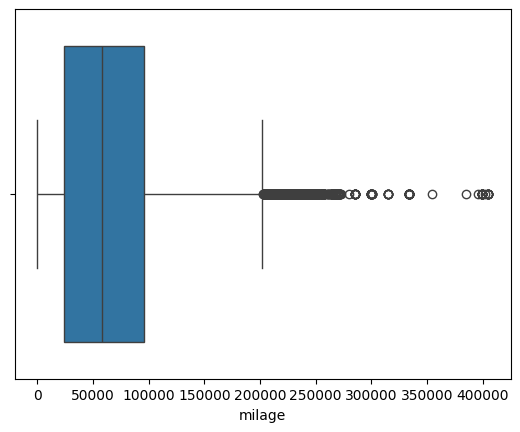

In [77]:
sns.boxplot(df,x='milage')

<Axes: xlabel='price'>

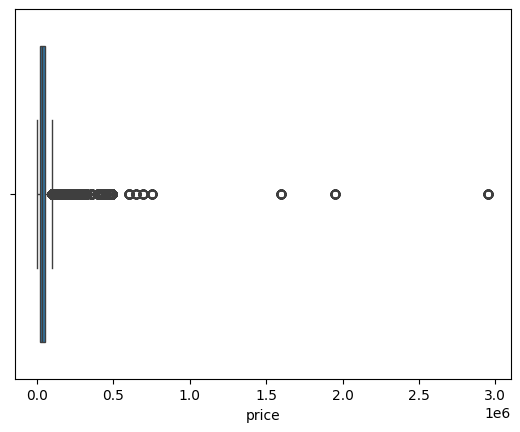

In [78]:
sns.boxplot(df,x='price')

In [79]:
categoric_cols=('brand','model','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title')

le=LabelEncoder()
for col3 in categoric_cols:
    df[col3]=le.fit_transform(df[col3])
df

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31,495,2007,213000,2,116,38,312,71,1,0,4200
1,1,28,930,2002,143250,2,366,38,263,10,0,0,4999
2,2,9,1575,2002,136731,1,640,38,38,71,1,0,13900
3,3,16,758,2017,19500,2,863,49,29,14,1,0,45000
4,4,36,1077,2021,7388,2,259,23,29,10,1,0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,8,604,2017,49000,2,866,49,304,10,1,0,27500
188529,188529,36,206,2018,28600,2,770,31,304,14,0,0,30000
188530,188530,36,223,2021,13650,2,921,23,304,14,1,0,86900
188531,188531,3,1471,2022,13895,2,512,1,82,14,1,0,84900


In [80]:
numeric_cols=('id','model_year','milage')


rs=RobustScaler()
for col in numeric_cols:
    df[col]=rs.fit_transform(df[[col]])

sc=StandardScaler()
for col2 in categoric_cols:
    df[col2]=sc.fit_transform(df[[col2]])

df


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,-1.000000,0.493978,-0.713392,-1.428571,2.177387,0.025320,-1.786099,0.640494,1.349823,0.903317,0.531822,0.0,4200
1,-0.999989,0.304919,0.120255,-2.142857,1.198920,0.025320,-0.887343,0.640494,0.922193,-0.627163,-1.880330,0.0,4999
2,-0.999979,-0.892449,1.356353,-2.142857,1.107470,-2.074819,0.097693,0.640494,-1.041414,0.903317,0.531822,0.0,13900
3,-0.999968,-0.451314,-0.209371,0.000000,-0.537070,0.025320,0.899383,1.486165,-1.119959,-0.526804,0.531822,0.0,45000
4,-0.999958,0.809075,0.401970,0.571429,-0.706979,0.025320,-1.272010,-0.512694,-1.119959,-0.627163,0.531822,0.0,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,0.999958,-0.955469,-0.504502,0.000000,-0.123238,0.025320,0.910168,1.486165,1.280006,-0.627163,0.531822,0.0,27500
188529,0.999968,0.809075,-1.267241,0.142857,-0.409413,0.025320,0.565046,0.102340,1.280006,-0.526804,-1.880330,0.0,30000
188530,0.999979,0.809075,-1.234662,0.571429,-0.619134,0.025320,1.107894,-0.512694,1.280006,-0.526804,0.531822,0.0,86900
188531,0.999989,-1.270566,1.157044,0.714286,-0.615698,0.025320,-0.362470,-2.204037,-0.657420,-0.526804,0.531822,0.0,84900


In [81]:
from pycaret.regression import *
reg_setup = setup(data=df, target='price', session_id=123,n_jobs=3)
models = compare_models()

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(188533, 13)"
4,Transformed data shape,"(188533, 13)"
5,Transformed train set shape,"(131973, 13)"
6,Transformed test set shape,"(56560, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:08:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,AdaBoost Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,23313.2931,5694236031.8863,75251.5360,0.0993,0.7533,0.7684,0.3720
lasso,Lasso Regression,23312.8145,5694236060.6492,75251.5365,0.0993,0.7533,0.7684,0.0850
ridge,Ridge Regression,23313.2336,5694236018.0000,75251.5358,0.0993,0.7533,0.7684,0.0630
lar,Least Angle Regression,23313.2932,5694236042.8473,75251.5361,0.0993,0.7533,0.7684,0.0610
llar,Lasso Least Angle Regression,23312.8203,5694236072.7884,75251.5367,0.0993,0.7533,0.7684,0.0630
br,Bayesian Ridge,23307.1466,5694234947.5592,75251.5174,0.0993,0.7521,0.7679,0.0730
en,Elastic Net,22716.0898,5753358186.7984,75643.8477,0.0899,0.6967,0.7380,0.0630
huber,Huber Regressor,19823.8637,5876461838.2258,76453.4751,0.0702,0.6847,0.4921,0.2870
par,Passive Aggressive Regressor,19789.2132,5910173727.0449,76674.5555,0.0648,0.6842,0.4744,0.1170
omp,Orthogonal Matching Pursuit,26621.8115,6041285661.2066,77529.4974,0.0436,0.8300,1.0538,0.0650


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 